In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
df = pd.read_excel('C:/!MyProjs/train/train.xlsx')

In [3]:
df.head()

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.08
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.61
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.86
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.00
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            9800 non-null   int64         
 1   Order Date    9800 non-null   datetime64[ns]
 2   Class         9800 non-null   object        
 3   Region        9800 non-null   object        
 4   Sub-Category  9800 non-null   object        
 5   Sales         9800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 459.5+ KB


 Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?

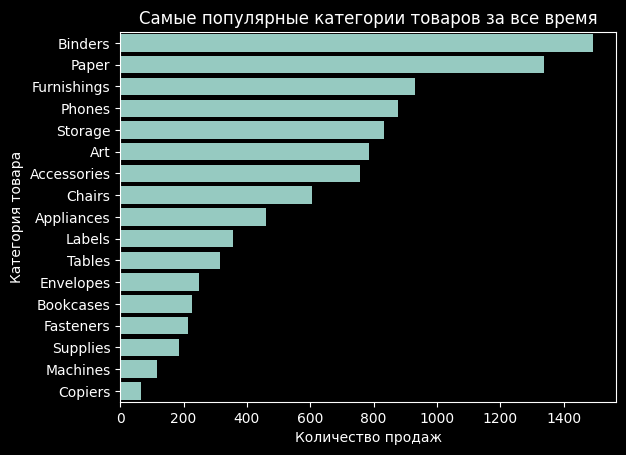

In [5]:
num_of_sales = df['Sub-Category'].value_counts()

sns.barplot(x=num_of_sales.values, y=num_of_sales.index, orient='h')
plt.title('Самые популярные категории товаров за все время')
plt.xlabel('Количество продаж')
plt.ylabel('Категория товара')
plt.show()

Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?

In [6]:
# выделение года
df['Order Year'] = df['Order Date'].dt.year
#последний год
last_year = df['Order Year'].max()
# число продаж по категориям за 2 года
num_of_sales_for_2_years = df[df['Order Year'].isin([last_year, last_year - 1])]['Sub-Category'].value_counts()


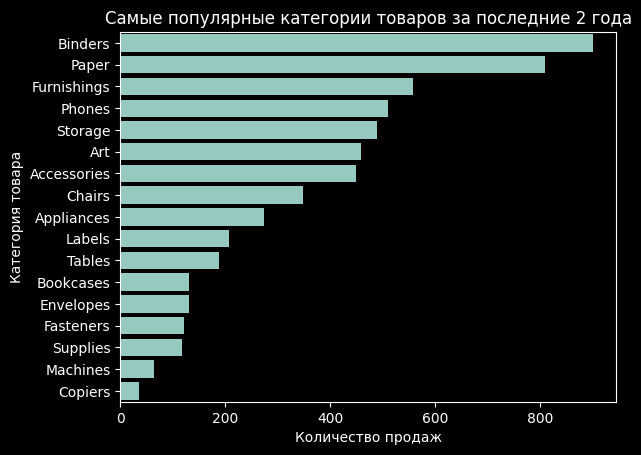

In [7]:
sns.barplot(x=num_of_sales_for_2_years.values, y=num_of_sales_for_2_years.index, orient='h')
plt.title('Самые популярные категории товаров за последние 2 года')
plt.xlabel('Количество продаж')
plt.ylabel('Категория товара')
plt.show()

 Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

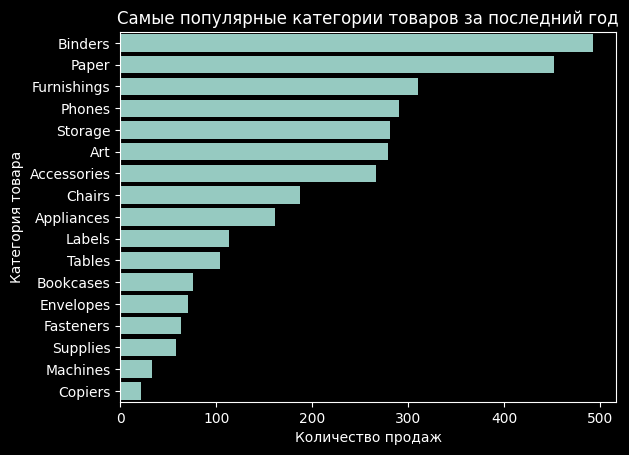

In [8]:
# число продаж по категориям за год
num_of_sales_last_year = df[df['Order Year'].isin([last_year])]['Sub-Category'].value_counts()

sns.barplot(x=num_of_sales_last_year.values, y=num_of_sales_last_year.index, orient='h')
plt.title('Самые популярные категории товаров за последний год')
plt.xlabel('Количество продаж')
plt.ylabel('Категория товара')
plt.show()

Сделать вывод на основе полученных результатов.

1. Исходя из полученных графиков можно выделить 3 группы категорий товаров по популярности: наиболее продаваемые (папки, бумага), средней продаваемости (мебель, телефоны, товары для хранения, товары для творчества, аксессуары) и наименее продаваемые (стулья, бытовая техника, этикетки, столы, книжные шкафы, конверты, крепежные материалы, канцелярские товары, машинное оборудование, копировальные аппараты). 
2. При сравнении числа продаж за все время, последние 2 года и последний год, популярность продаж каждой категории стабильно сохраняется.

Объединим категории в группы и рассмотрим число продаж по годам.


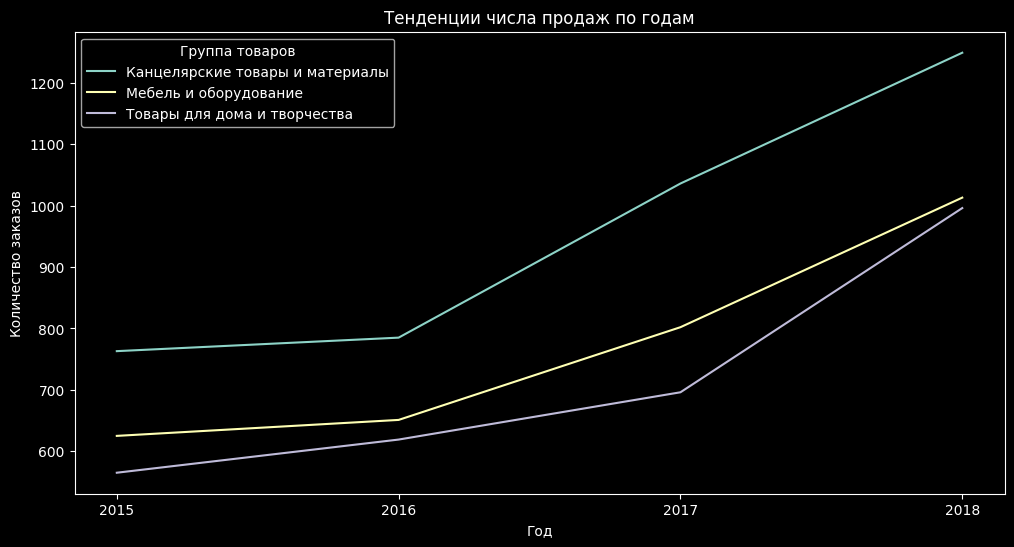

In [9]:
# объединим категории в группы
categories_group = {
    'Appliances': 'Товары для дома и творчества',
    'Bookcases': 'Мебель и оборудование',
    'Phones': 'Товары для дома и творчества',
    'Binders': 'Канцелярские товары и материалы',
    'Fasteners': 'Канцелярские товары и материалы',
    'Chairs': 'Мебель и оборудование',
    'Paper': 'Канцелярские товары и материалы',
    'Furnishings': 'Мебель и оборудование',
    'Art': 'Товары для дома и творчества',
    'Storage': 'Мебель и оборудование',
    'Labels': 'Канцелярские товары и материалы',
    'Accessories': 'Товары для дома и творчества',
    'Tables': 'Мебель и оборудование',
    'Supplies': 'Канцелярские товары и материалы',
    'Machines': 'Мебель и оборудование',
    'Copiers': 'Мебель и оборудование',
    'Envelopes': 'Канцелярские товары и материалы'
}
df['Category_group'] = df['Sub-Category'].map(categories_group)


sales_category_group_year = df.groupby(['Category_group', 'Order Year']).size().reset_index(name='Count')
plt.figure(figsize=(12, 6))
for category in sales_category_group_year['Category_group'].unique():
    subset = sales_category_group_year[sales_category_group_year['Category_group'] == category]
    plt.plot(subset['Order Year'], subset['Count'], label=category)

plt.xlabel('Год')
plt.ylabel('Количество заказов')
plt.title('Тенденции числа продаж по годам')
plt.xticks(sales_category_group_year['Order Year'].unique())  #избавиться от промежуточных делений
plt.legend().set_title('Группа товаров')
plt.show()

Группа "Канцелярские товары и материалы" является лидирующей по продажам за всё время и сохраняет восходящую тенденцию с другими группами.

Рассмотрим тенденции числа заказов каждой категории за каждый год.

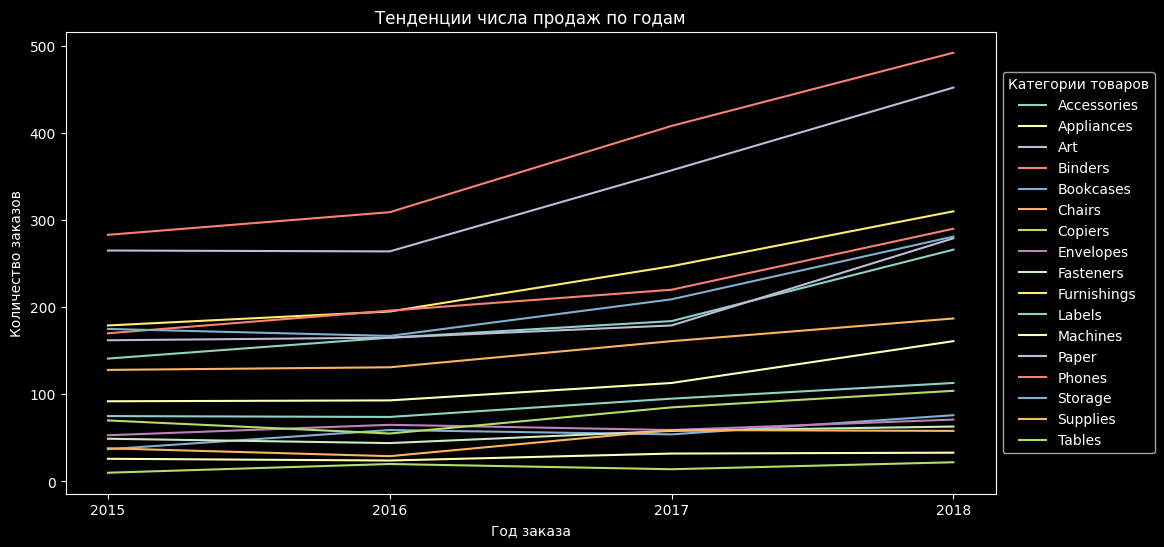

In [10]:
sales_each_year = df.groupby(['Sub-Category', 'Order Year']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))

for category in sales_each_year['Sub-Category'].unique():
    subset = sales_each_year[sales_each_year['Sub-Category'] == category]
    plt.plot(subset['Order Year'], subset['Count'], label=category)

plt.xlabel('Год заказа')
plt.ylabel('Количество заказов')
plt.title('Тенденции числа продаж по годам')
plt.xticks(sales_each_year['Order Year'].unique())  
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)).set_title('Категории товаров')
plt.show()

Исходя из этого графика мы можем сказать о наличии роста числа продаж большинства категорий за все время. Далее изучим тренды продаж более детально с учетом месяца.

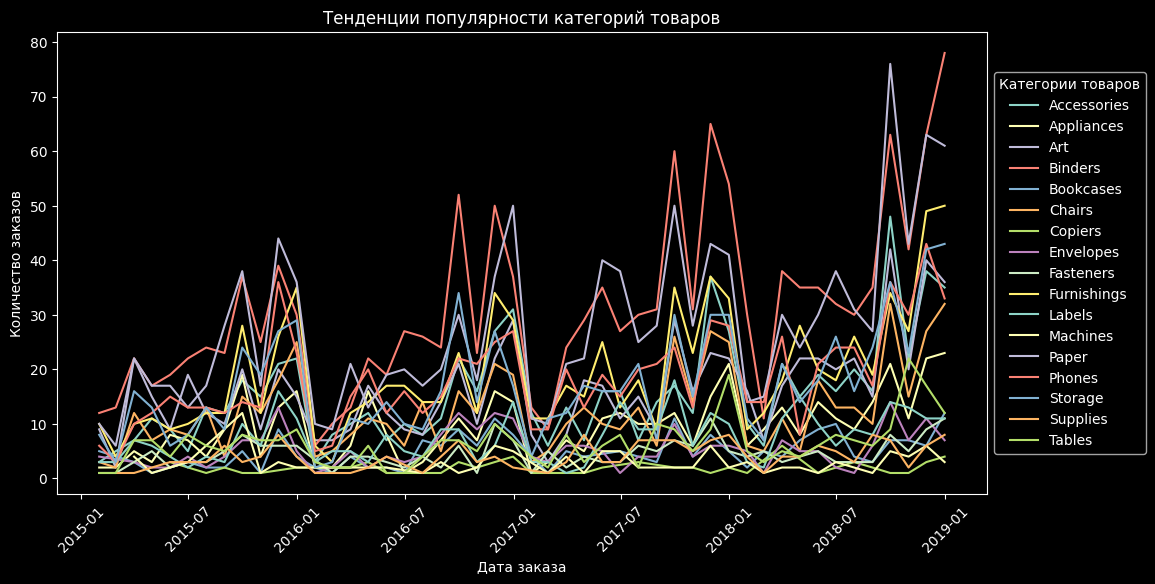

In [11]:
# группируем данные по категории и месяцу
sales_by_category_month = df.groupby(['Sub-Category', pd.Grouper(key='Order Date', freq='ME')]).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
for category in sales_by_category_month['Sub-Category'].unique():
    subset = sales_by_category_month[sales_by_category_month['Sub-Category'] == category]
    plt.plot(subset['Order Date'], subset['Count'], label=category)
plt.xlabel('Дата заказа')
plt.ylabel('Количество заказов')
plt.title('Тенденции популярности категорий товаров')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)).set_title('Категории товаров')
plt.xticks(rotation=45)
plt.show()

Также для групп категорий:

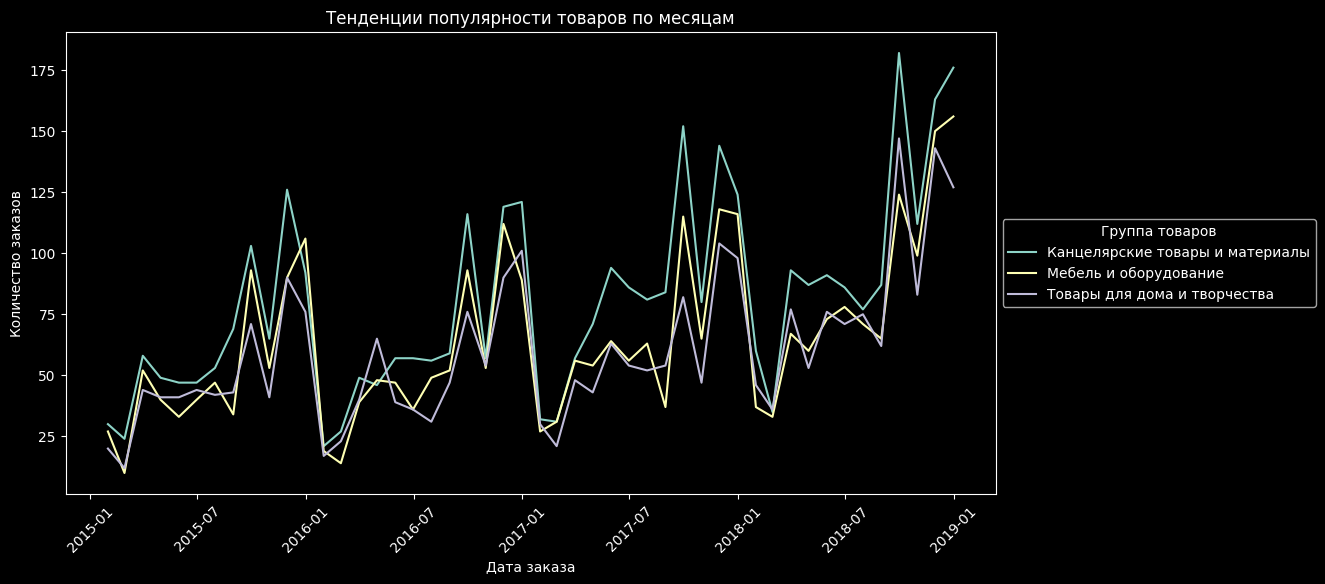

In [12]:
sales_by_group_month = df.groupby(['Category_group', pd.Grouper(key='Order Date', freq='ME')]).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
for category in sales_by_group_month['Category_group'].unique():
    subset = sales_by_group_month[sales_by_group_month['Category_group'] == category]
    plt.plot(subset['Order Date'], subset['Count'], label=category)
plt.xlabel('Дата заказа')
plt.ylabel('Количество заказов')
plt.title('Тенденции популярности товаров по месяцам')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)).set_title('Группа товаров')
plt.xticks(rotation=45)
plt.show()

Здесь уже наблюдаются колебания: пики продаж для всех категорий приходятся на сентябрь, т.е. начало учебного года. В связи с этим рассмотрим число продаж только по месяцам, чтобы получить более цельную картину о сезонности.

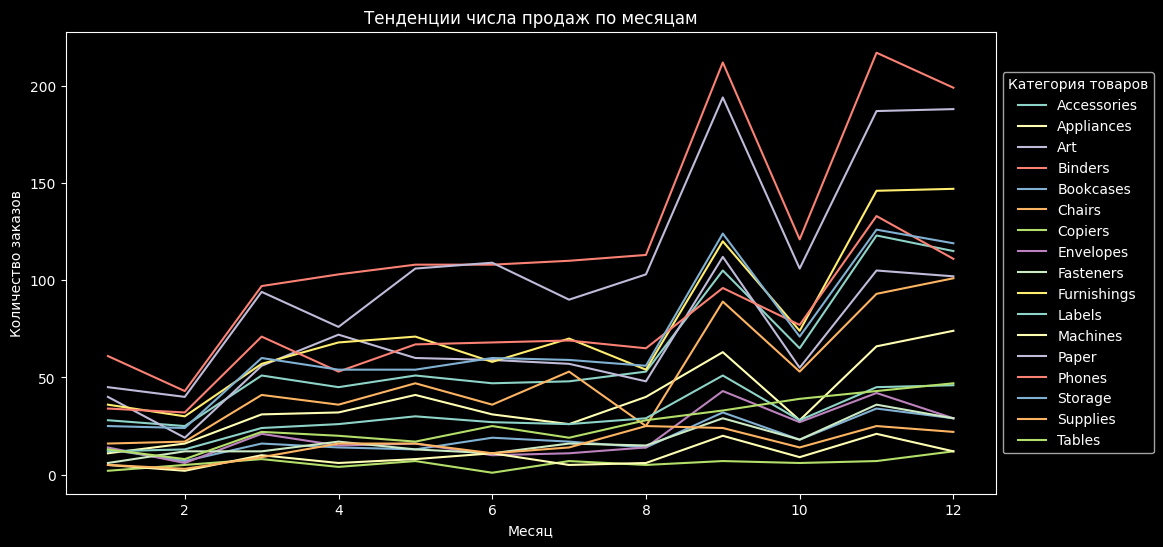

In [13]:
df['Order Month'] = df['Order Date'].dt.month

sales_each_month = df.groupby(['Sub-Category', 'Order Month']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))

for category in sales_each_month['Sub-Category'].unique():
    subset = sales_each_month[sales_each_month['Sub-Category'] == category]
    plt.plot(subset['Order Month'], subset['Count'], label=category)

plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.title('Тенденции числа продаж по месяцам')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)).set_title('Категория товаров')
plt.show()

Для групп категорий:

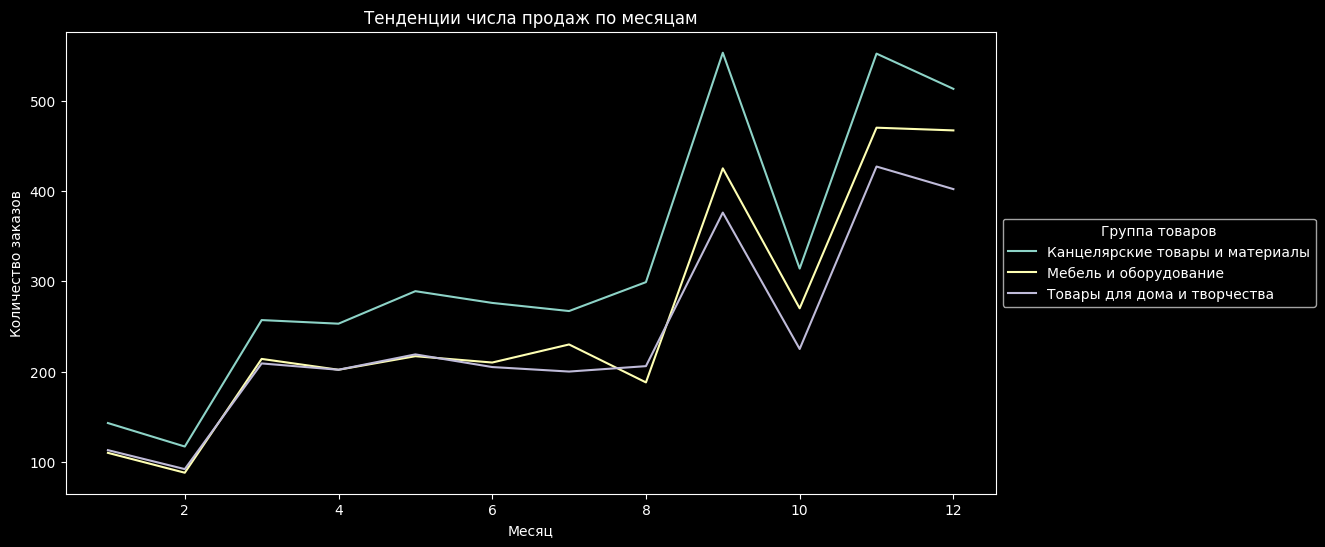

In [14]:
sales_group_month = df.groupby(['Category_group', 'Order Month']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))

for category in sales_group_month['Category_group'].unique():
    subset = sales_group_month[sales_group_month['Category_group'] == category]
    plt.plot(subset['Order Month'], subset['Count'], label=category)

plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.title('Тенденции числа продаж по месяцам')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)).set_title('Группа товаров')
plt.show()

Такая картина подтверждает вышесказанное о скачке продаж в сентябре (начало учебного года). Также видны высокие темпы продаж в ноябре и декабре (предновогодний период). Резкие снижения заметны в начале года (январь-февраль), что можно связать с большим числом выходных и коротким месяцем. В октябре темпы продаж снижаются до тех, что были до сентября. В весенний и летний периоды продажи стабильны.

Также рассмотрим зависимость объемов продаж от числа месяца.

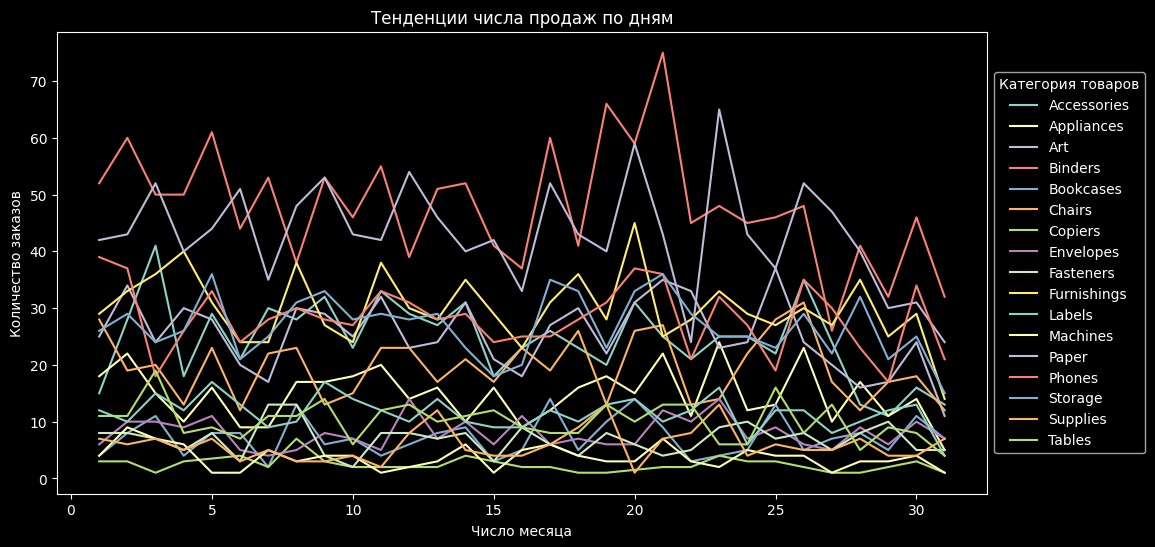

In [15]:
df['Order Day'] = df['Order Date'].dt.day

sales_each_day = df.groupby(['Sub-Category', 'Order Day']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))

for category in sales_each_day['Sub-Category'].unique():
    subset = sales_each_day[sales_each_day['Sub-Category'] == category]
    plt.plot(subset['Order Day'], subset['Count'], label=category)

plt.xlabel('Число месяца')
plt.ylabel('Количество заказов')
plt.title('Тенденции числа продаж по дням')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)).set_title('Категория товаров')
plt.show()

Из полученных результатов можно сказать, что день месяца слабо связан с количеством продаж, т.к. они, вероятно, преимущественно оптовые. В ином случае можно было бы ожидать рост спроса, например, в дни заработной платы.

Посмотрим есть ли связь с днями недели.

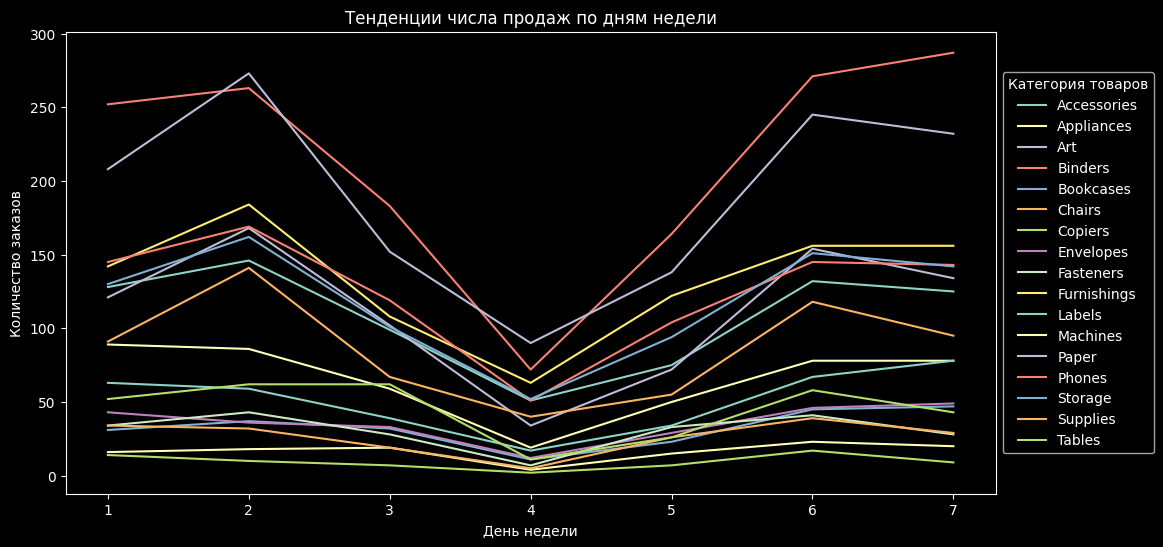

In [16]:
df['day_ow_week'] = df['Order Date'].dt.dayofweek + 1 #dayofweek выводит от 0 до 6

sales_by_day_of_week = df.groupby(['Sub-Category', 'day_ow_week']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))

for category in sales_by_day_of_week['Sub-Category'].unique():
    subset = sales_by_day_of_week[sales_by_day_of_week['Sub-Category'] == category]
    plt.plot(subset['day_ow_week'], subset['Count'], label=category)

plt.xlabel('День недели')
plt.ylabel('Количество заказов')
plt.title('Тенденции числа продаж по дням недели')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)).set_title('Категория товаров')
plt.show()

Заметны падения объемов продаж в середине рабочей недели в сравнении с началом и выходными.

Задание 2

Построить boxplot («Ящик с усами») на основе продаж (Sales). Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин).
 Можно использовать правило трех сигм. Однако любые другие решения приветствуются.

In [17]:
df['Sales'].describe()

count     9800.000000
mean     22921.757737
std      12601.999815
min       1002.794000
25%      12135.625000
50%      22882.060000
75%      33730.130000
max      44995.410000
Name: Sales, dtype: float64

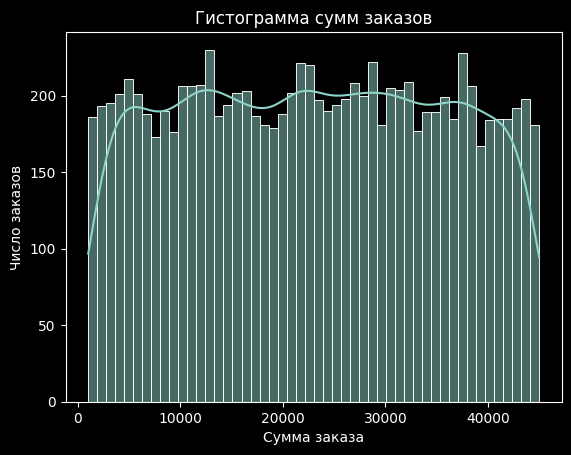

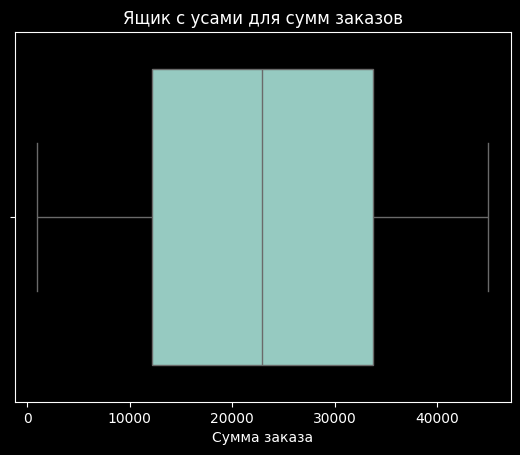

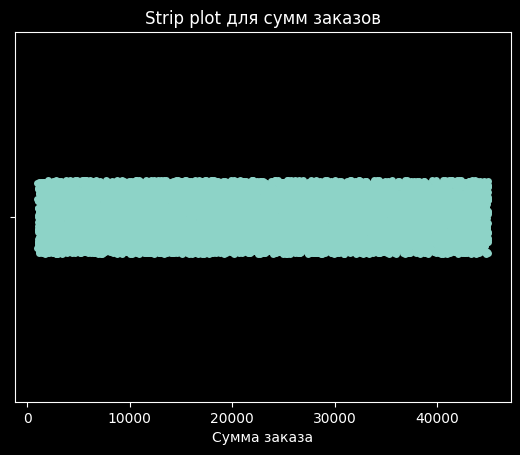

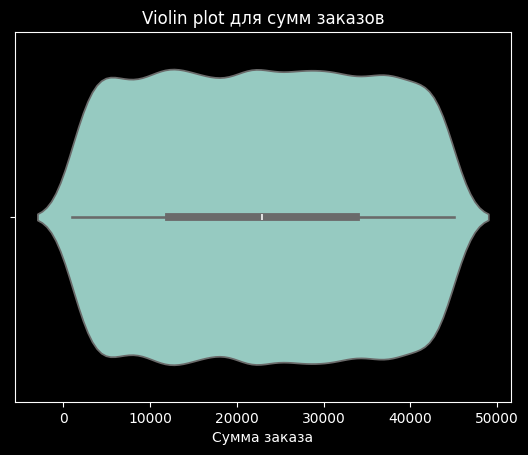

In [18]:
# гистограмма
sns.histplot(data=df, x='Sales', bins=50, kde=True)
plt.title('Гистограмма сумм заказов')
plt.xlabel('Сумма заказа')
plt.ylabel('Число заказов')
plt.show()

# ящик с усами
sns.boxplot(x=df['Sales'])
plt.xlabel('Сумма заказа')
plt.title('Ящик с усами для сумм заказов')
plt.show()

# strip plot
sns.stripplot(x=df['Sales'])
plt.xlabel('Сумма заказа')
plt.title('Strip plot для сумм заказов')
plt.show()

# violin plot
sns.violinplot(x=df['Sales'])
plt.xlabel('Сумма заказа')
plt.title('Violin plot для сумм заказов')
plt.show()

Исходя из полученных графиков можно сказать, что явные выбросы отсутствуют. Распределение скорее равномерное и не сводится к нормальному: так, мы бы ожидали, что большинство заказов сосредоточено вокруг среднего значения, а количество заказов с очень большими или очень маленькими суммами постепенно уменьшается к краям распределения.

 В связи с этим для обнаружения локальных аномалий посмотрим на распределение продаж исходя из имеющихся метаданных: "групп категорий", категорий, месяцу, году и классу.

Распределение по группам категорий товаров:

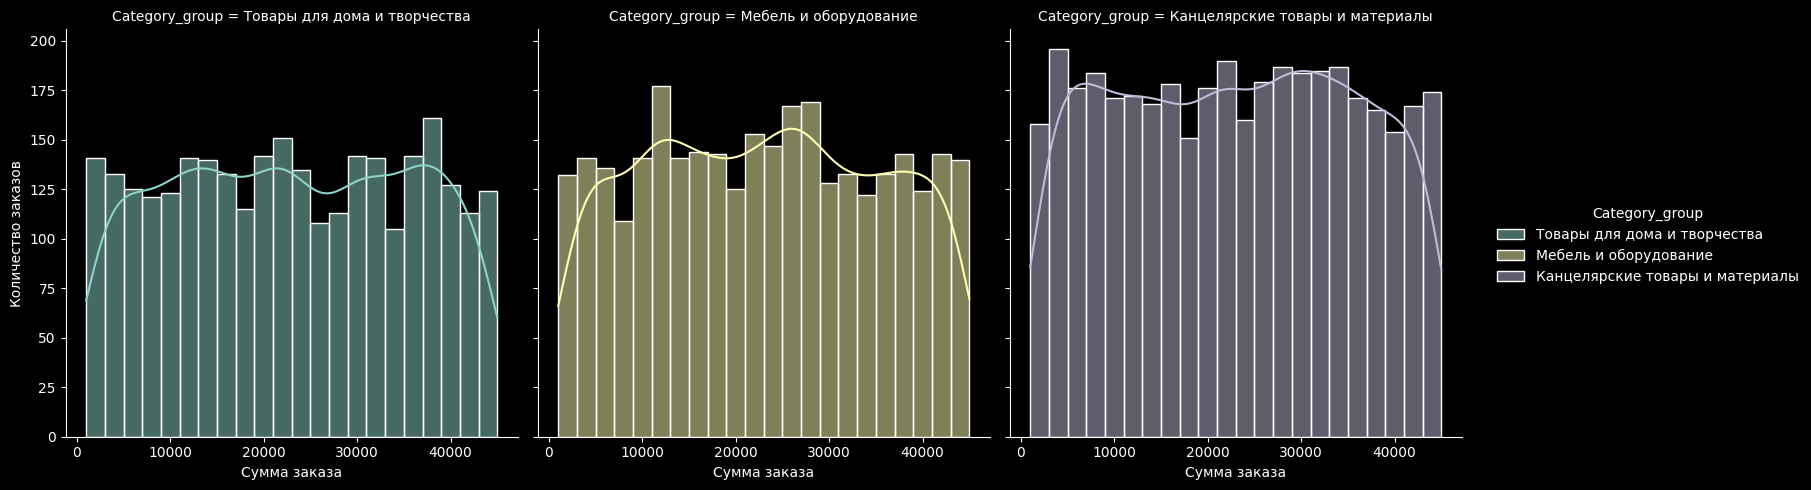

In [19]:
sns.displot(data=df, x="Sales", hue="Category_group", kind="hist", col="Category_group", height=5, aspect=1,  kde=True)

for ax in plt.gcf().axes:
    ax.set_xlabel('Сумма заказа')
    ax.set_ylabel('Количество заказов')

plt.show()

Распределение по категориям товаров:

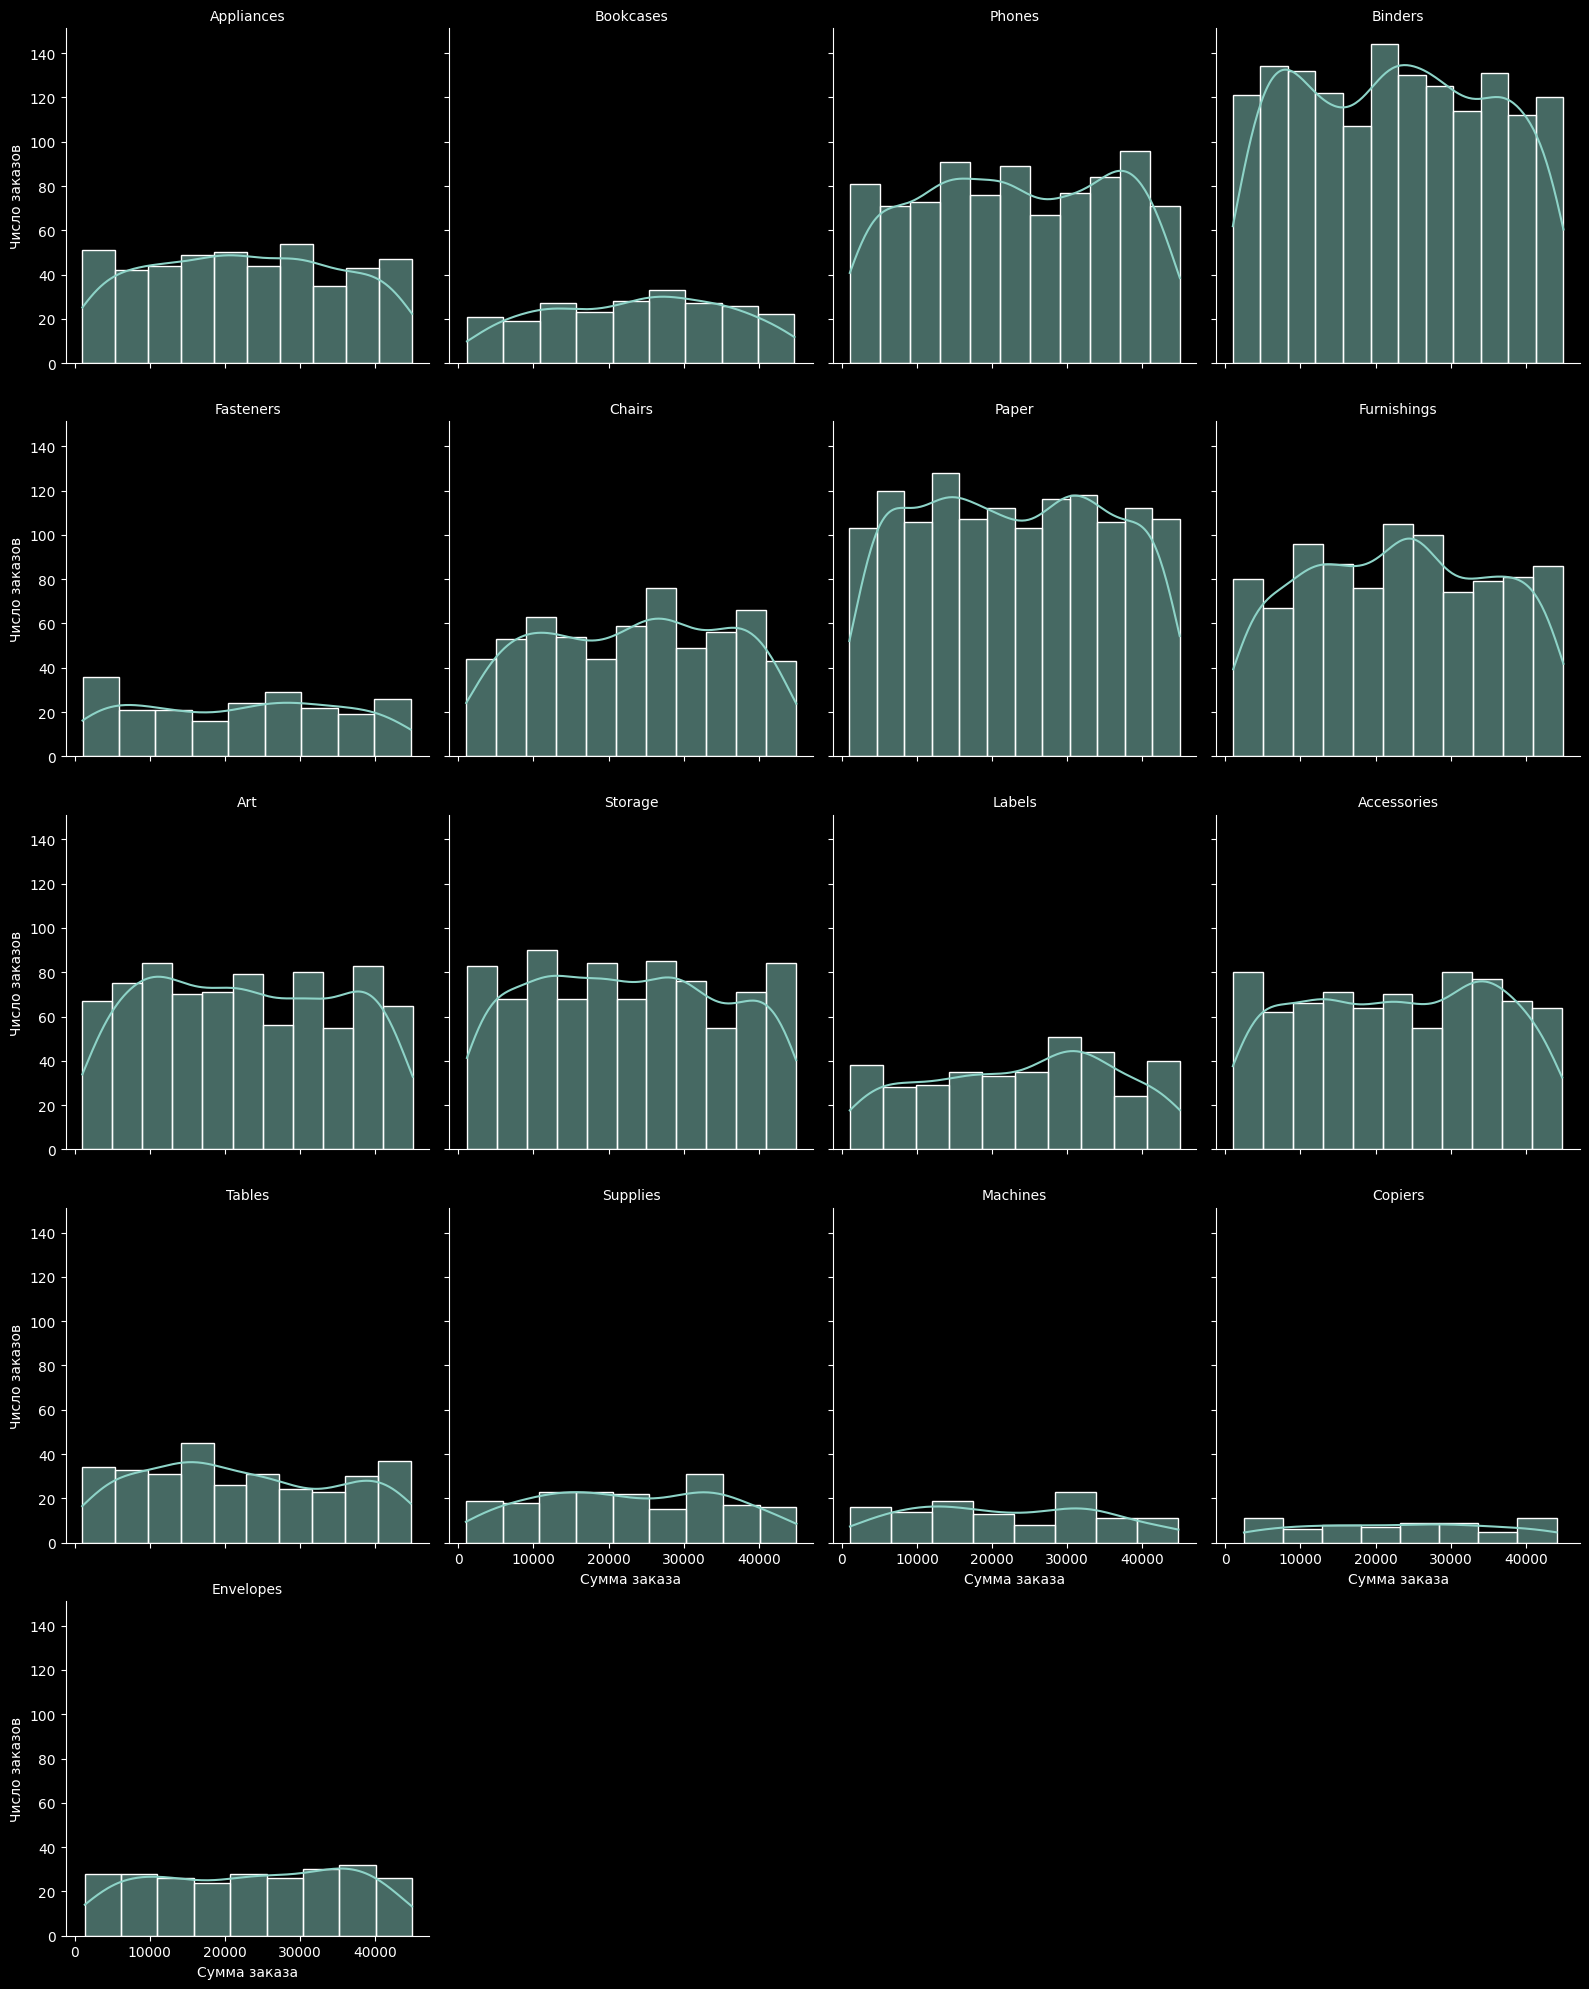

In [20]:
g = sns.FacetGrid(df, col="Sub-Category", col_wrap=4, height=4, aspect=1)
g.map(sns.histplot, "Sales", kde=True)
g.set_axis_labels("Сумма заказа", "Число заказов")
g.set_titles(col_template="{col_name}")

Распределение по месяцам:

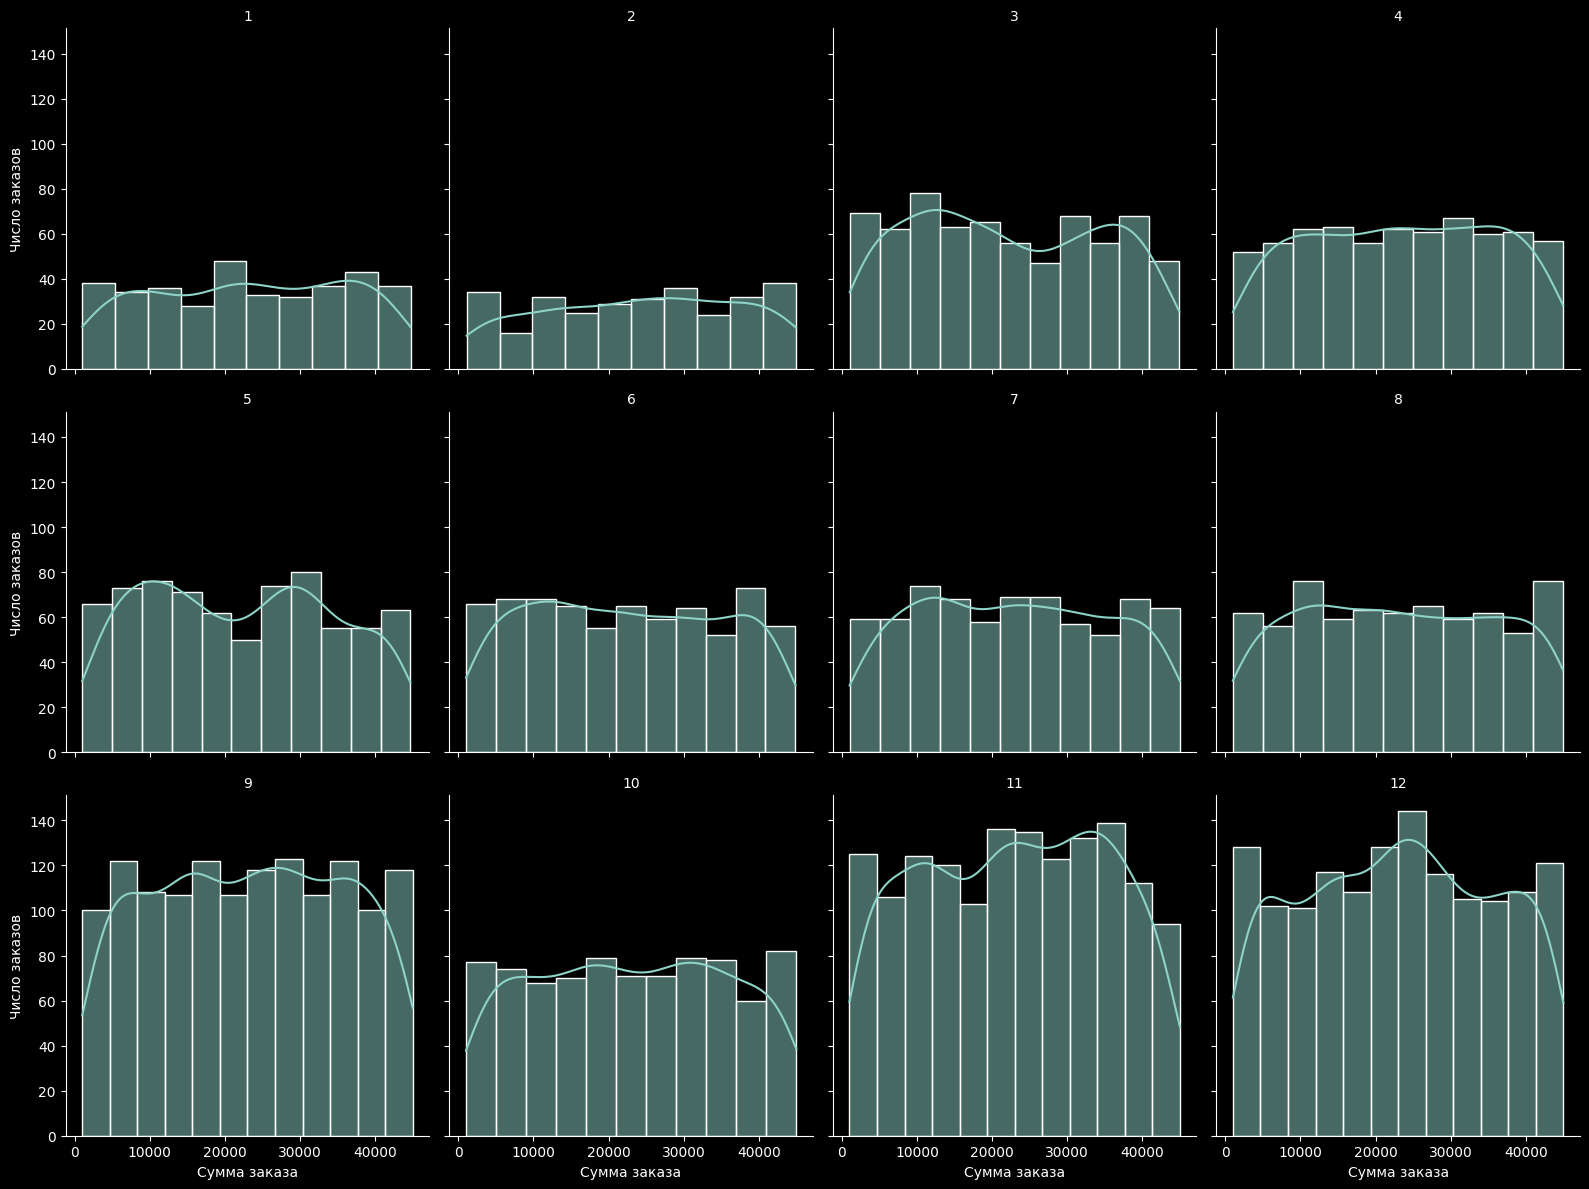

In [21]:
g = sns.FacetGrid(df, col="Order Month", col_wrap=4, height=4, aspect=1)
g.map(sns.histplot, "Sales", kde=True)
g.set_axis_labels("Сумма заказа", "Число заказов")
g.set_titles(col_template="{col_name}")

Распределение по годам:

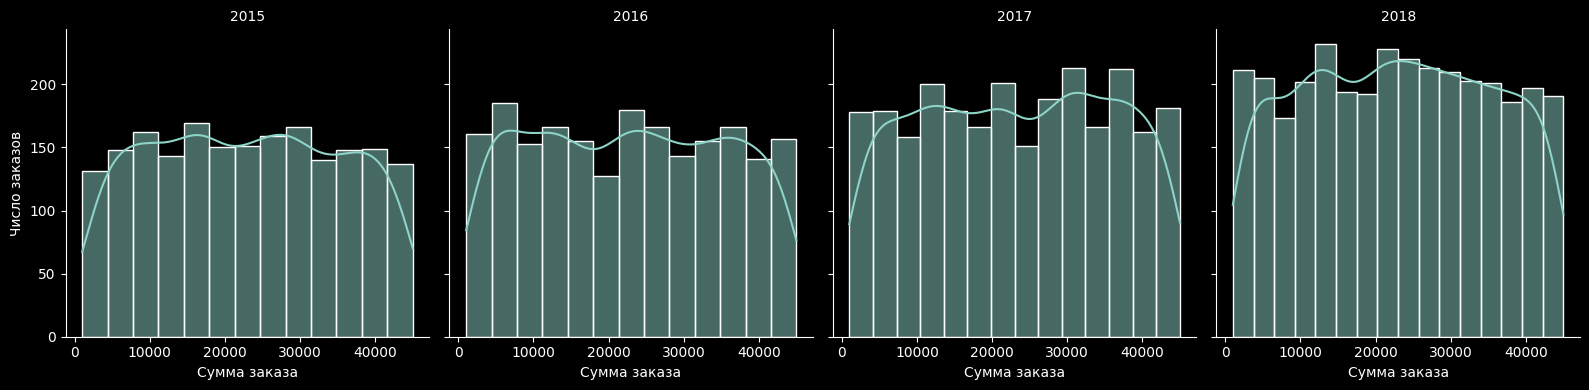

In [22]:
g = sns.FacetGrid(df, col="Order Year", col_wrap=4, height=4, aspect=1)
g.map(sns.histplot, "Sales", kde=True)
g.set_axis_labels("Сумма заказа", "Число заказов")
g.set_titles(col_template="{col_name}")

Распределение по классам:

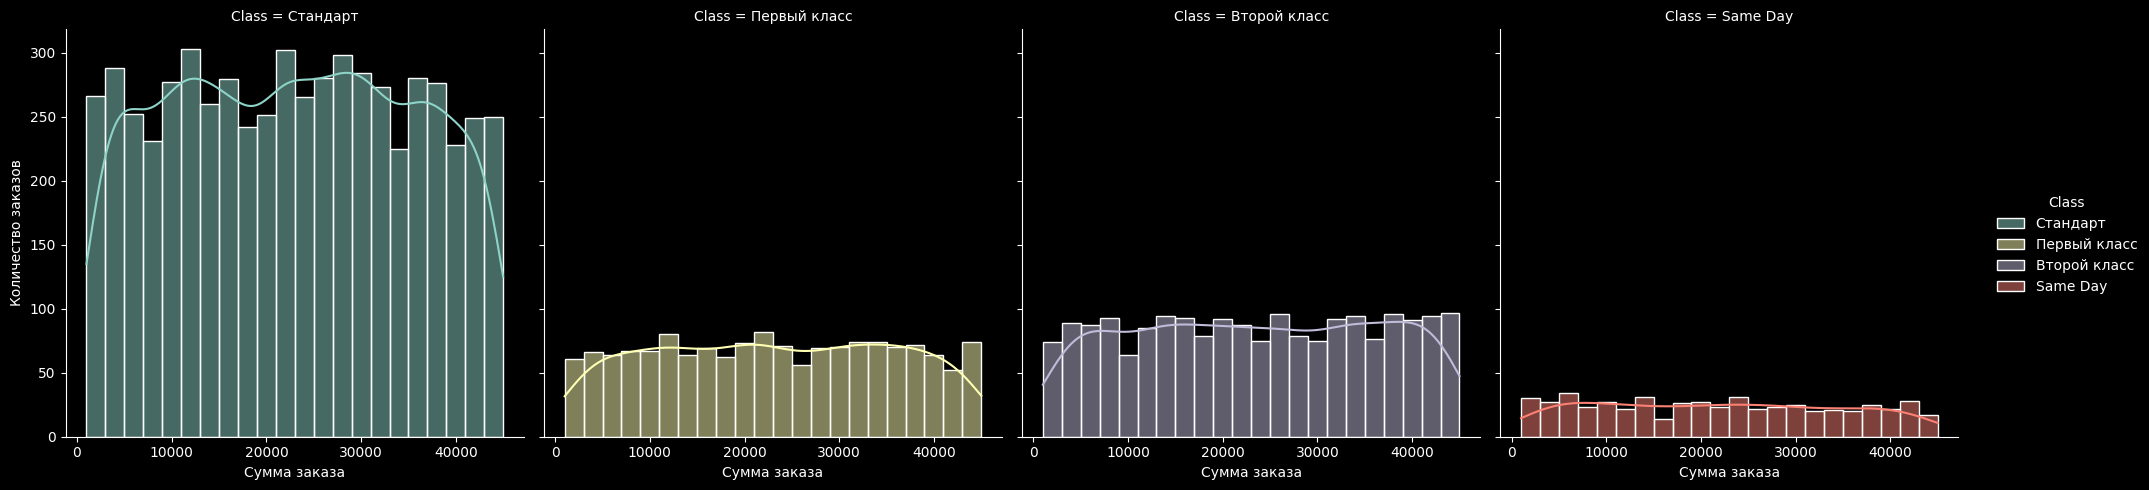

In [23]:
sns.displot(data=df, x="Sales", hue="Class", kind="hist", col="Class", height=5, aspect=1,  kde=True)

for ax in plt.gcf().axes:
    ax.set_xlabel('Сумма заказа')
    ax.set_ylabel('Количество заказов')

plt.show()

Исходя из всех представленных графиков можно сказать об отсутствии аномалий в данных, везде сохраняется равномерное распределение. 

Попробуем обнаружить выбросы через межквартильный размах, правило 3 сигм и стандартизированную оценку.

In [24]:
# определяем первый и третий квартили, вычисляем IQR
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
# границы
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR

print(f"Нижний порог для выбросов по IQR: {lower_bound_iqr}")
print(f"Верхний порог для выбросов по IQR: {upper_bound_iqr}")

print(f"В наших данных максимальное значение: {max(df['Sales'])}, а минимальное: {min(df['Sales'])}")

Нижний порог для выбросов по IQR: -20256.132499999996
Верхний порог для выбросов по IQR: 66121.8875
В наших данных максимальное значение: 44995.41, а минимальное: 1002.794


In [25]:
# среднее значение и стандартное отклонение
mean = df['Sales'].mean()
std = df['Sales'].std()
# границы по 3 сигмам
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std


print(f"\nНижний порог для выбросов по правилу 3 сигм: {lower_bound}")
print(f"Верхний порог для выбросов по правилу 3 сигм: {upper_bound}")

print(f"\nВ наших данных максимальное значение: {max(df['Sales'])}, а минимальное: {min(df['Sales'])} \n\nВыбросов не обнаружено.")


Нижний порог для выбросов по правилу 3 сигм: -14884.241709201222
Верхний порог для выбросов по правилу 3 сигм: 60727.757182262445

В наших данных максимальное значение: 44995.41, а минимальное: 1002.794 

Выбросов не обнаружено.


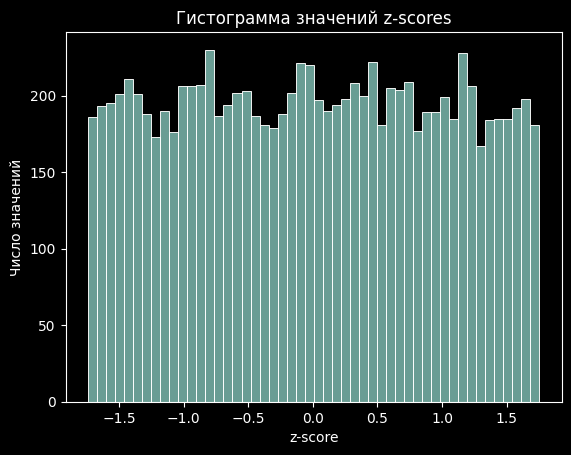

В наших данных показатель z-score колеблется от -1.74 до 1.75, исходя из чего мы утверждаем об отсутствии значимых выбросов. 
(значения меньше -2 и больше 2 (желательно -3 и 3) свидетельствуют о гипотетических аномалиях в данных*)


In [26]:
# считаем стандартизированную оценку
z_scores = stats.zscore(df['Sales'])
df['z_score'] = z_scores

sns.histplot(data=df, x='z_score', bins=50)
plt.title('Гистограмма значений z-scores')
plt.xlabel('z-score')
plt.ylabel('Число значений')
plt.show()

print(f"В наших данных показатель z-score колеблется от {round(min(df['z_score']), 2)} до {round(max(df['z_score']), 2)}, исходя из чего мы утверждаем об отсутствии значимых выбросов. \n(значения меньше -2 и больше 2 (желательно -3 и 3) свидетельствуют о гипотетических аномалиях в данных*)")

Исходя из проведенного анализа можно сказать об отсутствии анамалий в данных. Представленная картина распределения величин является показательной.

Задание 3

Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) на основе Sales. 
Сгруппировать данные на основе региона и группы продаж (Region, Sale_group). Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу.


In [27]:
# квантильное разбиение на 3 группы
df['Sale_group'] = pd.qcut(df['Sales'], q=3, labels=['Низкий', 'Средний', 'Высокий'])

Ввиду равномерного распределения Sales мы воспользовались квантильным разбиением. 

In [28]:
df.groupby('Sale_group')['Sales'].describe()

C:\Users\vfcmr\AppData\Local\Temp\ipykernel_4756\424812654.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Sale_group')['Sales'].describe()


,count,mean,std,min,25%,50%,75%,max
Sale_group,,,,,,,,
Низкий,3267.0,8380.797036,4234.816008,1002.794,4678.2310,8457.976,12135.430,15644.93
Средний,3266.0,22932.947131,4159.294458,15646.000,19402.1625,22882.060,26543.610,30116.30
Высокий,3267.0,37451.532467,4309.098124,30118.950,33731.0500,37393.850,41215.585,44995.41


In [29]:
# считаем каждый sale_group для каждого региона
sale_group_data = df.groupby(['Region', 'Sale_group']).size().reset_index(name='count')

C:\Users\vfcmr\AppData\Local\Temp\ipykernel_4756\606626800.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sale_group_data = df.groupby(['Region', 'Sale_group']).size().reset_index(name='count')


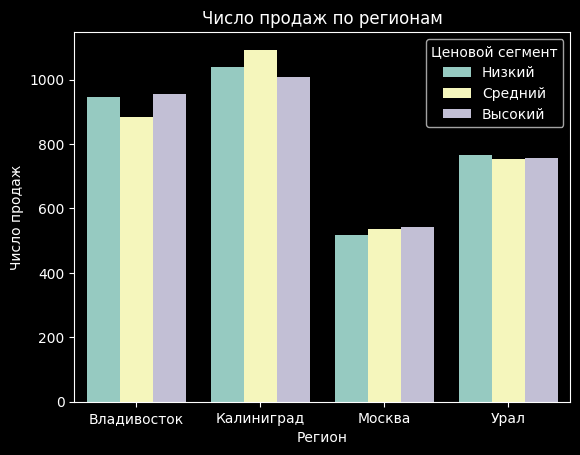

In [30]:
# Строим барчарт с распределением sale_group для каждого региона
sns.barplot(x='Region', y='count', hue='Sale_group', data=sale_group_data)
plt.title('Число продаж по регионам')
plt.xlabel('Регион')
plt.ylabel('Число продаж')
legend = plt.legend()
legend.set_title('Ценовой сегмент')
plt.show()

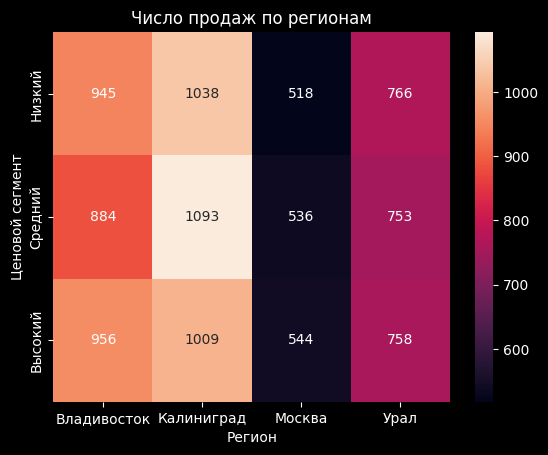

In [31]:
# тепловая карта с распределением sale_group для каждого региона
sns.heatmap(sale_group_data.pivot(index='Sale_group', columns='Region', values='count'), annot=True, fmt='.0f')
plt.title('Число продаж по регионам')
plt.xlabel('Регион')
plt.ylabel('Ценовой сегмент')
plt.show()

Как видно из графиков, в Москве и на Урале характерны низкие и средние (относительно других) значения числа продаж по всем ценовым сегментам заказов соответственно. Во Владивостоке объемы продаж выше средних, а наиболее высокие, особенно для среднего ценового сегмента, в Калининграде.

Посмотрим на абсолютные значения выручки с продаж.

In [32]:
sales_sum_df = df.groupby(['Region', 'Sale_group'])['Sales'].sum().reset_index(name='sum')


C:\Users\vfcmr\AppData\Local\Temp\ipykernel_4756\1069987792.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_sum_df = df.groupby(['Region', 'Sale_group'])['Sales'].sum().reset_index(name='sum')


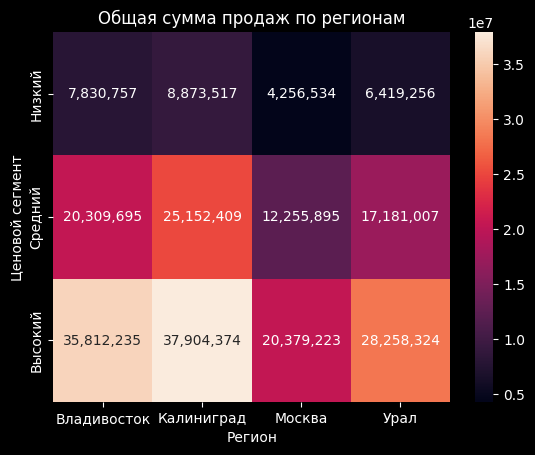

In [33]:
# тепловая карта с распределением сумм продаж для каждого региона по ценовому сегменту
sns.heatmap(sales_sum_df.pivot(index='Sale_group', columns='Region', values='sum'),
            annot=True, 
            fmt=',.0f')
plt.title('Общая сумма продаж по регионам')
plt.xlabel('Регион')
plt.ylabel('Ценовой сегмент')
plt.show()

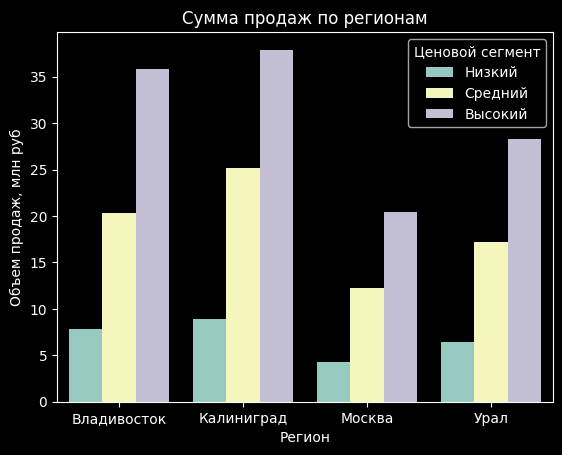

In [34]:
# барчарт с распределением сумм продаж для каждого региона по ценовому сегменту
data_sales_sum = sales_sum_df.copy(deep=True)
data_sales_sum.iloc[:, -1] = data_sales_sum['sum'] / 1000000 #для отображения в млн. руб.
sns.barplot(x='Region', y='sum', hue='Sale_group', data=data_sales_sum)
plt.title('Сумма продаж по регионам')
plt.xlabel('Регион')
plt.ylabel('Объем продаж, млн руб')
legend = plt.legend()
legend.set_title('Ценовой сегмент')

plt.show()

Исходя из графиков наибольшую прибыль приносят дорогостоящие продажи из Владивостока и Калининграда; прибыль выше средней характерна для продаж среднего сегмента в Калининграде, а также для продаж высокого сегмента на Урале; средний уровень прибыли получается из продаж среднего сегмента во Владивостоке и на Урале, а также в Москве из дорогостоящего сегмента; наименьшую прибыль приносят продажи среднего сегмента в Москве, а также наиболее дешевые продажи во всех городах.

Рассмотрим распределение категорий товаров по регионам и ценовому сегменту.

C:\Users\vfcmr\AppData\Local\Temp\ipykernel_4756\1830138467.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_sale_df = df.groupby(['Region', 'Category_group', 'Sale_group']).size().reset_index(name='count')


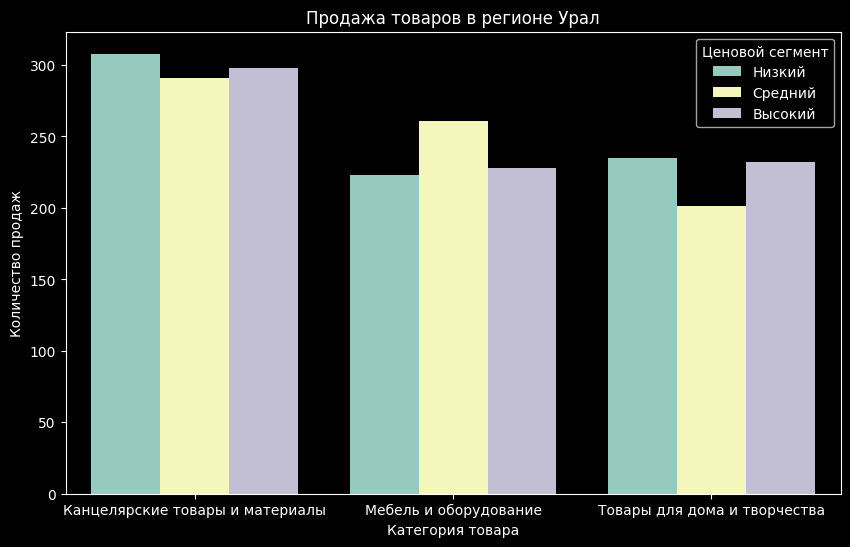

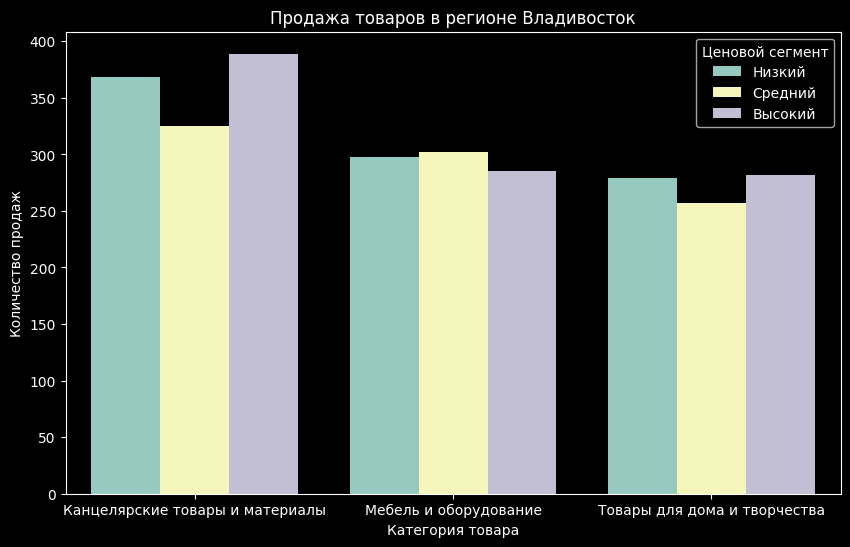

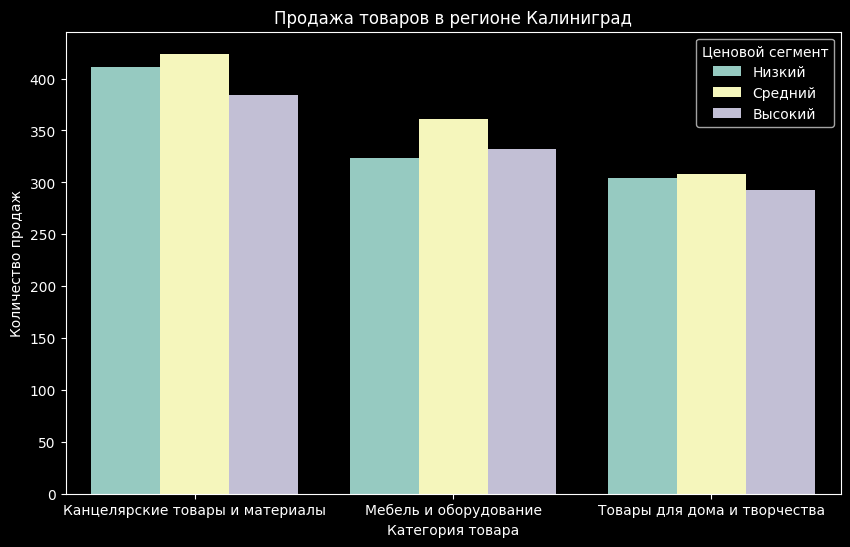

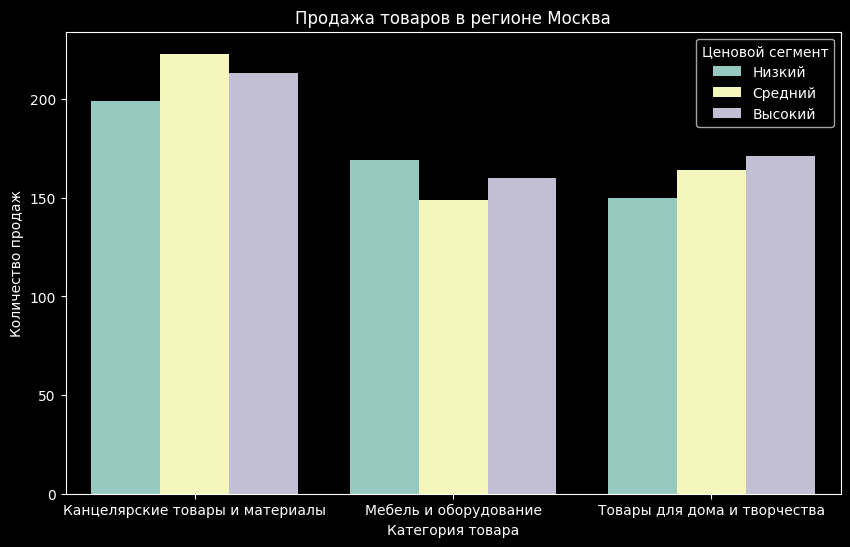

In [35]:
region_sale_df = df.groupby(['Region', 'Category_group', 'Sale_group']).size().reset_index(name='count')

def plot_region_category(region, figsize=(10, 6)):  
    data = region_sale_df[region_sale_df['Region'] == region]
    plt.figure(figsize=figsize)
    sns.barplot(x='Category_group', y='count', hue='Sale_group', data=data)
    plt.title(f'Продажа товаров в регионе {region}')
    plt.xlabel('Категория товара')
    plt.ylabel('Количество продаж')
    plt.legend().set_title('Ценовой сегмент')
    plt.show()

regions = df['Region'].unique()
for region in regions:
    plot_region_category(region)

Из полученных графиков и их сравнения можно выявить наиболее популярные категории товаров в разных регионах по ценовому сегменту. 
1. Для Москвы и Калининграда наиболее характерными являются продажи канцелярских товаров в среднем ценовом сегменте, в то время как на Урале в низком, а Владивостоке высоком. 
2. Мебель и оборудование во всех регионах кроме Москвы (преобладает низкий сегмент) преимущественно продается в среднем ценовом сегменте. 
3. Популярность товаров для дома и творчества низкого и высокого ценового сегмента одинакова для Владивостока и на Урале, в Калининграде приблизительно равные показатели во всех сегментах, а в Москве преобладают продажи в дорогом сегменте.

Далее рассмотрим распределение объемов продаж в регионах по годам по ценовому сегменту.

In [36]:
year_sale_df = df.groupby(['Region', 'Order Year', 'Sale_group']).size().reset_index(name='count')

C:\Users\vfcmr\AppData\Local\Temp\ipykernel_4756\217187152.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_sale_df = df.groupby(['Region', 'Order Year', 'Sale_group']).size().reset_index(name='count')


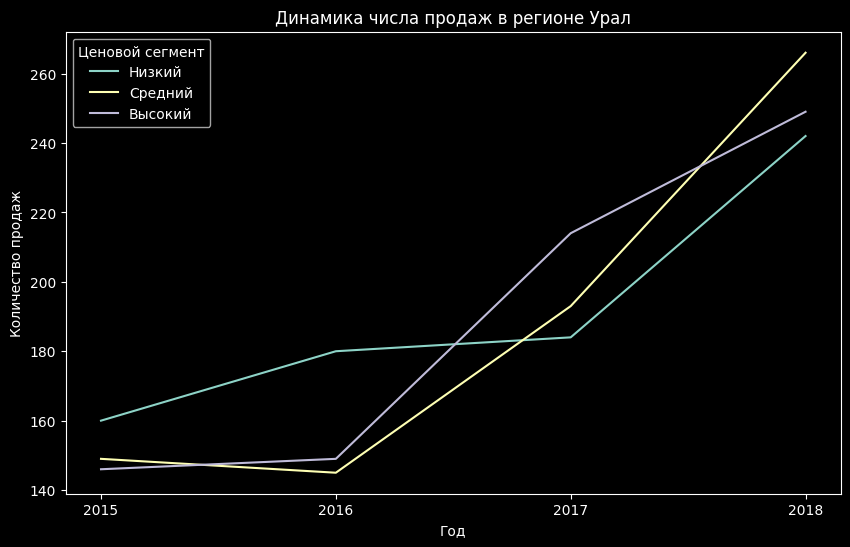

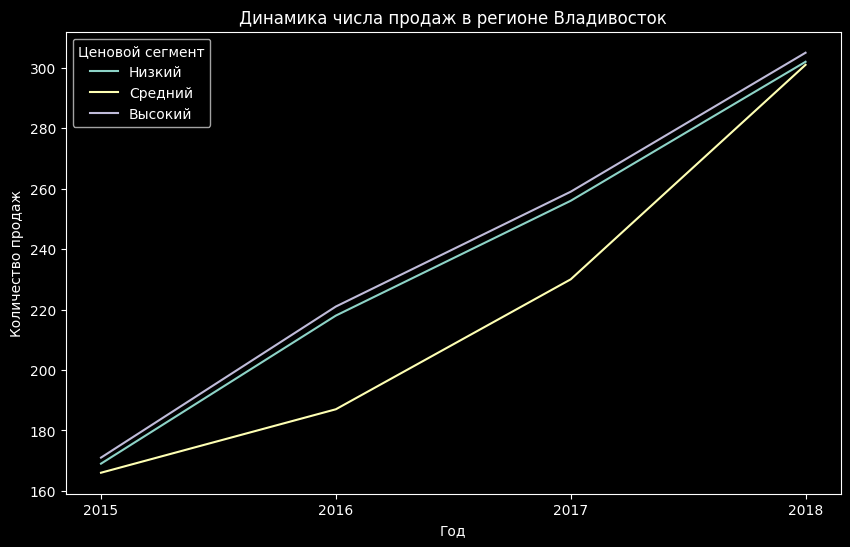

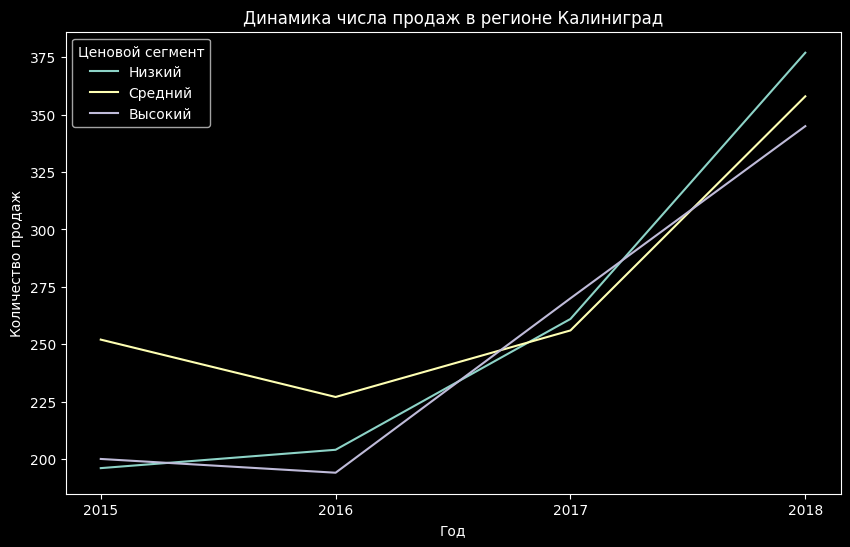

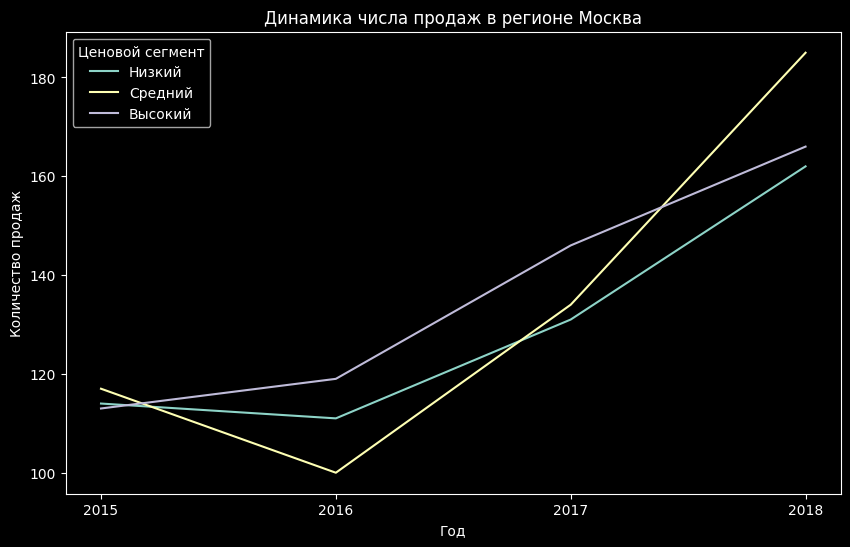

In [37]:
def plot_region_year(region, figsize=(10, 6)):
    data = year_sale_df[year_sale_df['Region'] == region]
    plt.figure(figsize=figsize)
    sns.lineplot(x='Order Year', y='count', hue='Sale_group', data=data)
    plt.xticks(data['Order Year'].unique())  
    plt.title(f'Динамика числа продаж в регионе {region}')
    plt.xlabel('Год')
    plt.ylabel('Количество продаж')
    plt.legend().set_title('Ценовой сегмент')
    plt.show()

regions = df['Region'].unique()
for region in regions:
    plot_region_year(region)   

Исходя из проведенного анализа ценовых сегментов и регионов за все годы можно определить следующие тенденции: для всех регионов наблюдается общий рост числа продаж с 2015 по 2018 годы (наиболее резкий - для периода 2016-2018). Исключением является период 2015-2016 год: продажи среднего ценового сегмента обладали нисходящей тенденцией во всех регионах (кроме Владивостока); падение низкого сегмента наблюдалось в Москве; падение высокого сегмента в Калининграде.

Рассмотрим тенденции выручки за каждый год по регионам.

In [38]:
year_sale_sum_df = df.groupby(['Region', 'Order Year', 'Sale_group'])['Sales'].sum().reset_index(name='sum')

C:\Users\vfcmr\AppData\Local\Temp\ipykernel_4756\3267354092.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_sale_sum_df = df.groupby(['Region', 'Order Year', 'Sale_group'])['Sales'].sum().reset_index(name='sum')


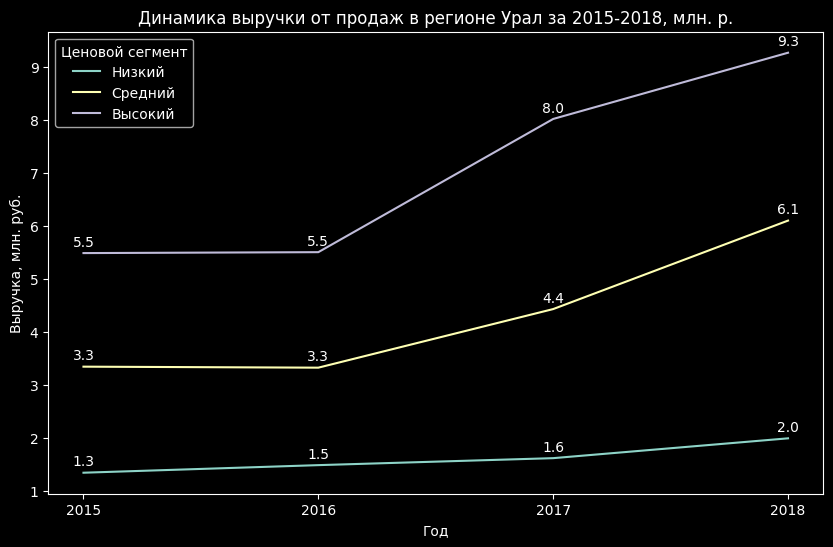

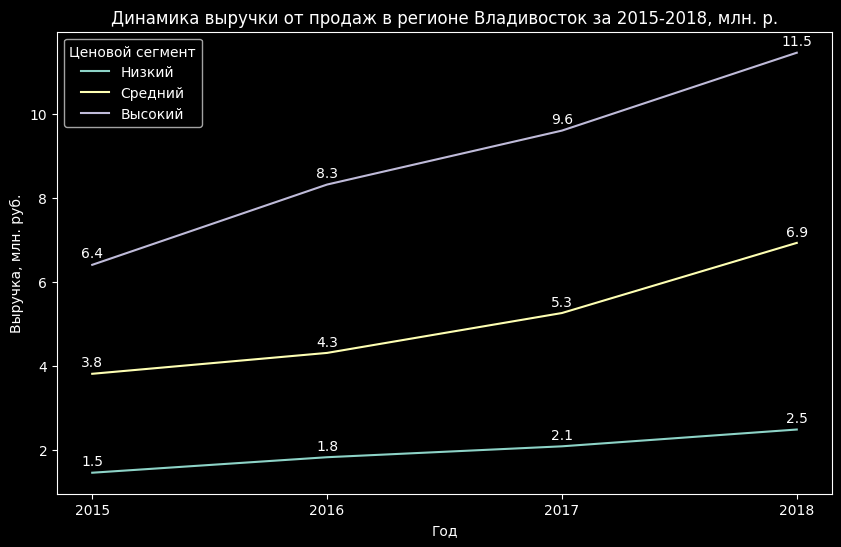

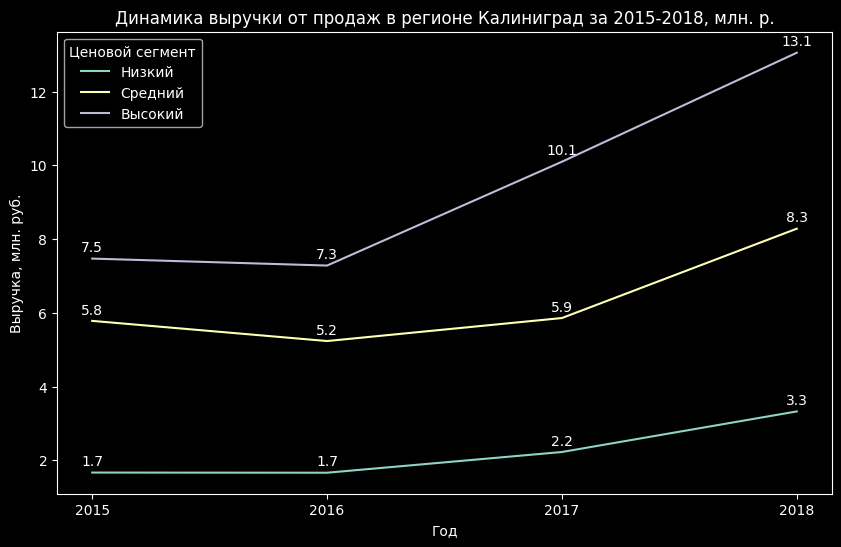

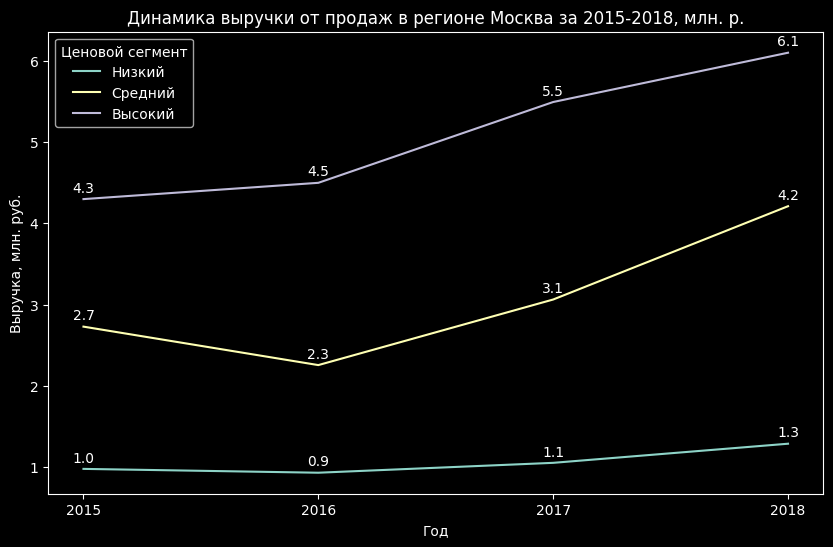

In [39]:
def plot_region_sale_year(region, figsize=(10, 6)):
    data = year_sale_sum_df[year_sale_sum_df['Region'] == region]
    data.iloc[:, -1] = data['sum'] / 1000000
    
    plt.figure(figsize=figsize)
    sns.lineplot(x='Order Year', y='sum', hue='Sale_group', data=data, markers=True)
    plt.xticks(data['Order Year'].unique())
    plt.title(f'Динамика выручки от продаж в регионе {region} за 2015-2018, млн. р.')
    plt.xlabel('Год')
    plt.ylabel('Выручка, млн. руб.')
    plt.legend().set_title('Ценовой сегмент')
    
    for line in plt.gca().lines:
        for x, y in zip(line.get_xdata(), line.get_ydata()):
            plt.annotate(f'{y:.1f}', xy=(x, y), textcoords='offset points', xytext=(0, 5), ha='center')
    plt.show()

regions = df['Region'].unique()
for region in regions:
    plot_region_sale_year(region)        

Исходя из показателей выручки, также как и для числа продаж, есть общая восходящая тенденция для всех ценовых сегментов с 2015 по 2018 годы с некоторыми просадками 2015-2016 годы. Для высокого сегмента продаж наиболее сильная динамика выручки заметна в Калининграде и на Урале. Для среднего сегмента - в Москве и на Урале. Для сегмента низкой стоимости - в Калининграде и во Владивостоке. 

Описав все полученные результаты, выделим ключевые паттерны и тенденции.

По регионам:



1. Калининград: Высокие объемы продаж, особенно в среднем ценовом сегменте. Наибольшую прибыль приносят дорогостоящие продажи и продажи среднего сегмента.
2. Владивосток: Объемы продаж выше средних в низком и высоком ценовых сегментах. Дорогостоящие, а также среднего сегмента, продажи приносят наибольшую прибыль.
3. Урал: Средние объемы продаж. Выше средней прибыли приносят продажи высокого сегмента.
4. Москва: Низкие объемы продаж. Наименьший уровень прибыли во всех сегментах.


По категориям товаров:

1. Канцелярские товары: Популярны в среднем ценовом сегменте в Москве и Калининграде, в низком – на Урале, в высоком – во Владивостоке.
2. Мебель и оборудование: Преимущественно продаются в среднем ценовом сегменте во всех регионах, кроме Москвы.
3. Товары для дома и творчества: Популярность низкого и высокого ценовых сегментов одинакова для Владивостока и Урала, в Калининграде приблизительно равные показатели во всех сегментах, в Москве преобладают продажи в дорогом сегменте.

По динамике продаж:

1. Наблюдается общий рост числа продаж и выручки с 2015 по 2018 годы.
2. В период 2015-2016 годов наблюдались просадки продаж среднего ценового сегмента во всех регионах (кроме Владивостока), падение низкого сегмента в Москве и падение высокого сегмента в Калининграде.
3. Наиболее сильная динамика выручки для высокого сегмента заметна в Калининграде и на Урале, для среднего – в Москве и на Урале, для низкого – в Калининграде и во Владивостоке.

Наиболее прибыльная группа, соответственно, это продажи товаров дорогостоящего сегмента во Владивостоке и в Калининграде. Среди категорий товаров - канцелярия и материалы.